Single-channel CSC (Constrained Data Fidelity)
==============================================

This example demonstrates solving a constrained convolutional sparse coding problem with a greyscale signal

  $$\mathrm{argmin}_\mathbf{x} \sum_m \| \mathbf{x}_m \|_1 \; \text{such that} \;  \left\| \sum_m \mathbf{d}_m * \mathbf{x}_m - \mathbf{s} \right\|_2 \leq \epsilon \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import plot
plot.config_notebook_plotting()
import sporco.metric as sm
from sporco.admm import cbpdn

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = util.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

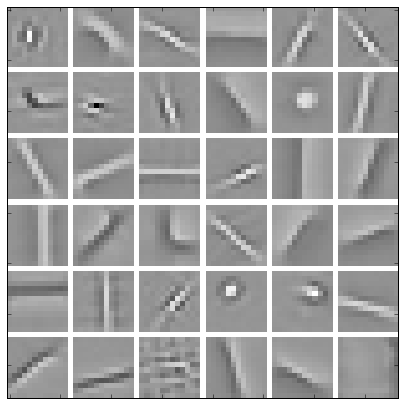

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [admm.cbpdn.ConvMinL1InL2Ball](http://sporco.rtfd.org/en/latest/modules/sporco.admm.cbpdn.html#sporco.admm.cbpdn.ConvMinL1InL2Ball) solver options.

In [5]:
epsilon = 3.4e0
opt = cbpdn.ConvMinL1InL2Ball.Options({'Verbose': True, 'MaxMainIter': 200,
                        'HighMemSolve': True, 'LinSolveCheck': True,
                        'RelStopTol': 5e-3, 'AuxVarObj': False, 'rho': 50.0,
                        'AutoRho': {'Enabled': False}})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvMinL1InL2Ball(D, sh, epsilon, opt)
X = b.solve()
print("ConvMinL1InL2Ball solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       Cnstr     r         s       
--------------------------------------------


   0  1.59e+03  0.00e+00  2.26e-01  6.50e+00


   1  2.06e+03  3.13e+00  1.54e-01  3.59e+00


   2  1.85e+03  0.00e+00  1.61e-01  2.67e+00


   3  1.80e+03  2.08e+00  1.07e-01  1.99e+00


   4  1.60e+03  0.00e+00  1.04e-01  1.45e+00


   5  1.61e+03  1.29e+00  7.54e-02  1.09e+00


   6  1.53e+03  0.00e+00  6.93e-02  8.48e-01


   7  1.48e+03  8.49e-01  5.39e-02  6.61e-01


   8  1.44e+03  0.00e+00  4.89e-02  5.13e-01
   9  1.37e+03  5.33e-01  4.00e-02  4.06e-01


  10  1.30e+03  0.00e+00  3.60e-02  3.16e-01


  11  1.27e+03  3.41e-01  3.07e-02  2.49e-01


  12  1.25e+03  0.00e+00  2.81e-02  1.97e-01


  13  1.23e+03  2.22e-01  2.48e-02  1.57e-01


  14  1.20e+03  0.00e+00  2.29e-02  1.25e-01


  15  1.18e+03  1.40e-01  2.08e-02  1.01e-01


  16  1.16e+03  0.00e+00  1.94e-02  8.07e-02


  17  1.14e+03  9.04e-02  1.79e-02  6.56e-02


  18  1.12e+03  0.00e+00  1.68e-02  5.35e-02


  19  1.11e+03  5.90e-02  1.58e-02  4.44e-02


  20  1.10e+03  0.00e+00  1.49e-02  3.68e-02


  21  1.08e+03  3.75e-02  1.41e-02  3.16e-02


  22  1.07e+03  0.00e+00  1.34e-02  2.70e-02
  23  1.06e+03  2.40e-02  1.28e-02  2.37e-02


  24  1.05e+03  0.00e+00  1.22e-02  2.11e-02


  25  1.04e+03  1.58e-02  1.17e-02  1.93e-02


  26  1.04e+03  0.00e+00  1.12e-02  1.76e-02


  27  1.03e+03  1.02e-02  1.07e-02  1.64e-02


  28  1.02e+03  0.00e+00  1.03e-02  1.53e-02


  29  1.02e+03  6.79e-03  9.92e-03  1.45e-02


  30  1.01e+03  0.00e+00  9.54e-03  1.38e-02
  31  1.00e+03  4.70e-03  9.19e-03  1.32e-02


  32  9.96e+02  0.00e+00  8.87e-03  1.26e-02
  33  9.90e+02  3.05e-03  8.56e-03  1.21e-02


  34  9.85e+02  0.00e+00  8.27e-03  1.16e-02


  35  9.81e+02  2.05e-03  7.99e-03  1.12e-02


  36  9.76e+02  0.00e+00  7.73e-03  1.08e-02


  37  9.71e+02  1.54e-03  7.48e-03  1.05e-02


  38  9.66e+02  0.00e+00  7.24e-03  1.01e-02


  39  9.62e+02  9.55e-04  7.02e-03  9.74e-03


  40  9.58e+02  0.00e+00  6.81e-03  9.41e-03


  41  9.55e+02  6.62e-04  6.61e-03  9.10e-03


  42  9.52e+02  0.00e+00  6.41e-03  8.83e-03


  43  9.49e+02  7.15e-04  6.22e-03  8.59e-03


  44  9.45e+02  2.04e-04  6.04e-03  8.36e-03


  45  9.42e+02  5.34e-04  5.88e-03  8.12e-03


  46  9.38e+02  7.49e-05  5.71e-03  7.89e-03


  47  9.35e+02  2.20e-04  5.55e-03  7.69e-03


  48  9.32e+02  3.15e-05  5.40e-03  7.48e-03


  49  9.29e+02  2.34e-04  5.26e-03  7.28e-03


  50  9.27e+02  1.97e-04  5.12e-03  7.09e-03


  51  9.24e+02  3.06e-04  4.99e-03  6.92e-03


  52  9.22e+02  1.89e-04  4.86e-03  6.72e-03
  53  9.20e+02  1.91e-04  4.74e-03  6.53e-03


  54  9.18e+02  9.42e-05  4.62e-03  6.35e-03


  55  9.15e+02  6.03e-05  4.51e-03  6.19e-03


  56  9.13e+02  9.54e-05  4.40e-03  6.03e-03


  57  9.11e+02  1.18e-04  4.29e-03  5.88e-03


  58  9.09e+02  1.71e-04  4.19e-03  5.73e-03


  59  9.07e+02  1.69e-04  4.09e-03  5.60e-03


  60  9.05e+02  1.85e-04  3.99e-03  5.48e-03


  61  9.04e+02  1.44e-04  3.90e-03  5.35e-03


  62  9.02e+02  1.35e-04  3.81e-03  5.22e-03


  63  9.01e+02  1.19e-04  3.73e-03  5.10e-03


  64  8.99e+02  1.48e-04  3.65e-03  4.99e-03
--------------------------------------------
ConvMinL1InL2Ball solve time: 18.13s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % sm.psnr(img, imgr))

Reconstruction PSNR: 37.28dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

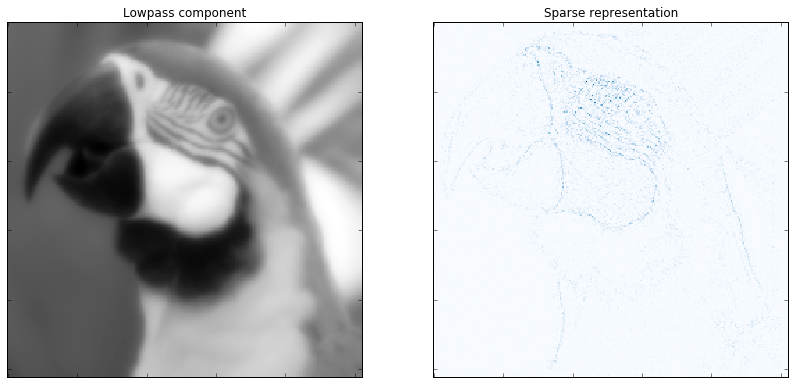

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

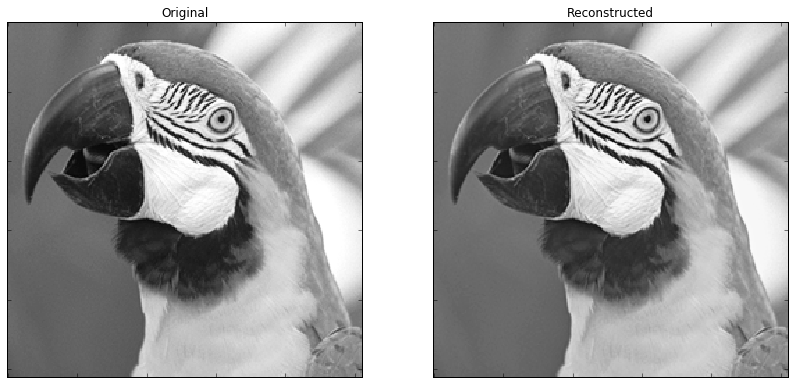

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, ADMM primary and dual residuals, and automatically adjusted ADMM penalty parameter against the iteration number.

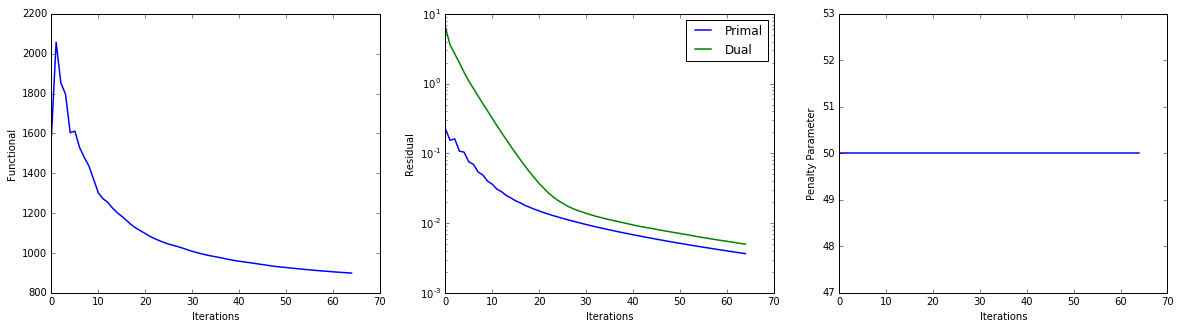

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(np.vstack((its.PrimalRsdl, its.DualRsdl)).T,
          ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          lgnd=['Primal', 'Dual'], fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.Rho, xlbl='Iterations', ylbl='Penalty Parameter', fig=fig)
fig.show()